# Projeto Final

## Parte 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

### Cria dataframe com apenas os atributos "category", "type" e "value"

In [2]:
df = pd.read_csv('./misp.csv', delimiter=',', nrows = None)
df.dataframeName = 'misp.csv'

df_chosen = df[['category', 'type', 'value']].copy()
df_chosen

,category,type,value
0,Network activity,url,http://api.holycrossservices.info/dri/donate.php
1,Network activity,ip-dst,176.103.56.36
2,Network activity,hostname,api.holycrossservices.info
3,Network activity,url,http://api.holycrossservices.net/dri/donate.php
4,Network activity,hostname,api.holycrossservices.org
...,...,...,...
138719,Network activity,domain,rimpro.ru
138720,Network activity,domain,techboss.net
138721,Network activity,domain,tommylam.com
138722,Network activity,domain,trudprom.ru


### Mapeia strings de categorias para indices inteiros

In [3]:
d = dict([(y,x+1) for x,y in enumerate(sorted(set(list(df_chosen['category'].unique()))))])
df_chosen['category_index'] = df['category'].map(d)
d

{'Antivirus detection': 1,
 'Artifacts dropped': 2,
 'Attribution': 3,
 'External analysis': 4,
 'Financial fraud': 5,
 'Internal reference': 6,
 'Network activity': 7,
 'Other': 8,
 'Payload delivery': 9,
 'Payload installation': 10,
 'Payload type': 11,
 'Persistence mechanism': 12,
 'Targeting data': 13}

### Mapeia string de tipos para indices inteiros

In [4]:
d = dict([(y,x+1) for x,y in enumerate(sorted(set(list(df_chosen['type'].unique()))))])
df_chosen['type_index'] = df['type'].map(d)
d

{'AS': 1,
 'attachment': 2,
 'btc': 3,
 'campaign-id': 4,
 'campaign-name': 5,
 'comment': 6,
 'domain': 7,
 'domain|ip': 8,
 'email-attachment': 9,
 'email-dst': 10,
 'email-src': 11,
 'email-subject': 12,
 'filename': 13,
 'filename|md5': 14,
 'filename|sha1': 15,
 'filename|sha256': 16,
 'hostname': 17,
 'imphash': 18,
 'ip-dst': 19,
 'ip-src': 20,
 'link': 21,
 'malware-sample': 22,
 'md5': 23,
 'mutex': 24,
 'named pipe': 25,
 'other': 26,
 'pattern-in-file': 27,
 'pattern-in-memory': 28,
 'pattern-in-traffic': 29,
 'pdb': 30,
 'pehash': 31,
 'prtn': 32,
 'regkey': 33,
 'regkey|value': 34,
 'sha1': 35,
 'sha256': 36,
 'snort': 37,
 'ssdeep': 38,
 'target-location': 39,
 'target-machine': 40,
 'target-org': 41,
 'target-user': 42,
 'text': 43,
 'threat-actor': 44,
 'uri': 45,
 'url': 46,
 'user-agent': 47,
 'vulnerability': 48,
 'whois-creation-date': 49,
 'whois-registrant-email': 50,
 'whois-registrant-name': 51,
 'whois-registrant-phone': 52,
 'whois-registrar': 53,
 'windows-sc

### Cria dataframe apenas com indices das categorias e dos tipos

In [5]:
df_selected = df_chosen[['category_index', 'type_index']].copy()
df_selected

,category_index,type_index
0,7,46
1,7,19
2,7,17
3,7,46
4,7,17
...,...,...
138719,7,7
138720,7,7
138721,7,7
138722,7,7


### Separa o dataset nas porções 80/20

In [6]:
df_shuffle = shuffle(df_selected, random_state=None).reset_index(drop=True)

int_80 = int(df_shuffle.shape[0] * 0.8)

df_80 = df_shuffle.loc[:int_80, :]
df_20 = df_shuffle.loc[int_80:, :]

## Parte 2

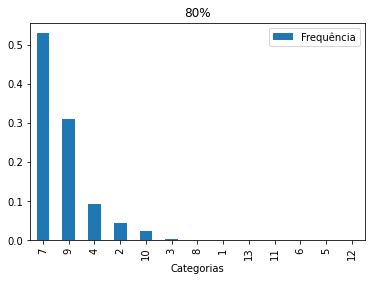

In [30]:
plot_df_80 = pd.DataFrame({
    'Categorias': df_80['category_index'].unique(),
    'Frequência': df_80['category_index'].value_counts(normalize=True)
})
plot_df_80.plot(x ='Categorias', y='Frequência', kind = 'bar', title='80%')

plt.show()

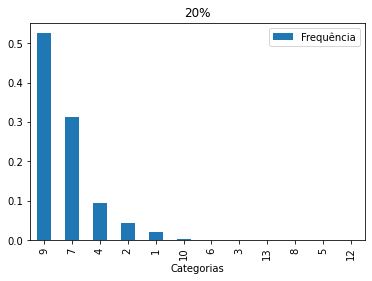

In [31]:
plot_df_20 = pd.DataFrame({
    'Categorias': df_20['category_index'].unique(),
    'Frequência': df_20['category_index'].value_counts(normalize=True)
})
plot_df_20.plot(x ='Categorias', y='Frequência', kind = 'bar', title='20%')
plt.savefig('20.png')
plt.show()

## Parte 3

## KNN

In [9]:
df_80['category_index'].value_counts()

7     58795
9     34264
4     10225
2      4749
10     2442
3       232
1       135
13       55
8        37
5        22
12       15
6         7
11        2
Name: category_index, dtype: int64

In [10]:
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

### Separando o conjunto de dados de treinamento e teste, sendo 80% para treino e 20% para teste

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_80.drop('category_index',axis=1),df_80['category_index'], test_size=0.2)

### Executando o KNN, o método predict tenta prever os valores para os dados de teste

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Definindo o número de vizinhos.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
resultado = knn.predict(X_test)
resultado

array([7, 7, 4, ..., 9, 9, 7], dtype=int64)

### Cria matriz de confusão

Exemplo: dos 27 valores que o modelo previu como sendo da categoria 1, todos os 27 foram classificados corretamente

In [13]:
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    2   3     4  5      7     9  12  13    All
Real                                                 
1          0   0    27  0      0     0   0   0     27
2         99   0     0  0      0   881   2   0    982
3          0  28    28  1      0     1   0   0     58
4          0   0  1662  0     17   344   0   0   2023
5          0   0     0  2      0     0   0   0      2
6          0   0     1  0      0     0   0   0      1
7          0   0     3  0  11803     0   0   0  11806
8          0   0     6  0      0     0   0   0      6
9         42   0     9  0     17  6733   0   0   6801
10         4   0     2  0      0   469   0   0    475
12         1   0     0  0      0     0   1   0      2
13         0   0     0  0      0     0   0  13     13
All      146  28  1738  3  11837  8428   3  13  22196


## Random Forest

### Treinando o algoritmo e gerando o modelo

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(df_80.drop('category_index',axis=1),df_80['category_index'], test_size=0.2, random_state=30)
tree_rf = RandomForestRegressor()

model_rf = tree_rf.fit(X_train, y_train)
resultado_rf = model_rf.predict(X_test)

### Erro médio quadrático

In [28]:
mean_squared_error(y_test, resultado_rf)

2.024209106941632

### Score

In [29]:
model_rf.score(X_test,y_test)

0.3926008396287143

## Perceptron

In [33]:
from sklearn.linear_model import Perceptron

X_train, X_test, y_train, y_test = train_test_split(df_80.drop('category_index',axis=1),df_80['category_index'], test_size=0.2, random_state=30)
perc = Perceptron()

model_perc = perc.fit(X_train, y_train)
resultado_perc = model_perc.predict(X_test)
resultado_perc

array([7, 7, 7, ..., 7, 7, 7], dtype=int64)

In [34]:
mean_squared_error(y_test, resultado_perc)

3.371418273562804

In [35]:
model_perc.score(X_test,y_test)

0.5337898720490178